In [1]:
#Consideriamo i dati di tabella.
#x = 0.32, 2.83, 3.94, 6.52, 7.51, 11.43, 0.96, 3.32, 4.62
#y = 1.60, 5.30, 11.88, 15.28, 18.19, 32.55, 1.23, 0.32, 8.03
#x = 6.65, 8.96, 11.45, 0.96, 3.80, 5.91, 6.83, 9.56, 12.02
#y = 16.47, 16.25, 37.30, 0.48, 0.06, 9.91, 14,96, 21.82, 33.19

In [2]:
#1: Formulare degli appropriati modelli di regressione.

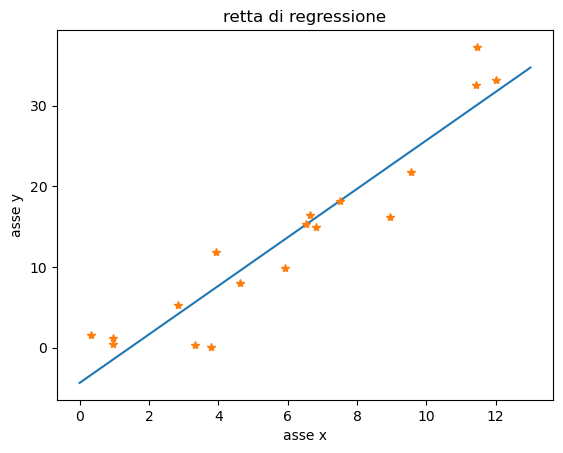

In [3]:
import numpy as np
import matplotlib.pyplot as plt

DATA = np.loadtxt("DATA_reg_lin_2.dat")
x = DATA[:,0] 
y = DATA[:,1]
n = x.size

#calcolo dei coefficenti di regressione b0 e b1 --> y = b0 + b1*x
x_media = np.mean(x)
y_media = np.mean(y)

sigma_xy = np.sum((x-x_media)*(y-y_media))/n
var_x = np.sum((x-x_media)**2)/n

#ricaviamo b0 e b1
b0 = y_media - sigma_xy/var_x * x_media
b1 = sigma_xy/var_x

xx = np.linspace(0,13, 100)
yy = b0 + b1 * xx

plt.plot(xx,yy)
plt.plot(x,y,"*")
plt.xlabel("asse x")
plt.ylabel("asse y")
plt.title("retta di regressione")
plt.show()

In [4]:
#calcolo dei coefficenti di regressione usando le formule della regressione lienare multipla

In [5]:
#creiamo un array con tutti gli elementi uguali a 1 usando 
x1 = np.ones(n)
#creiamo un array con i valori della tabella x
x2 = x
#creiamo una matrice vuota con tutti gli elementi uguali a 0
#inseriamo nella matrice X i due array
X = np.zeros((n,2))
X[:,0]=x1
X[:,1]=x2
display(X) 

#calcoliamo la matrice pseudo inversa di X
X_pseudoInversa = np.linalg.pinv(X)

#calcolaimo b che sarà il prodotto riga per colonna
b = np.dot(X_pseudoInversa, y)
print("b: ",b)

#calcoliamo il vettore dei valori stimati e quindi il prodotto riga per colonna
y_hat = np.dot(X,b)
print("Y: " , y_hat)

array([[ 1.  ,  0.32],
       [ 1.  ,  2.83],
       [ 1.  ,  3.94],
       [ 1.  ,  6.52],
       [ 1.  ,  7.51],
       [ 1.  , 11.43],
       [ 1.  ,  0.96],
       [ 1.  ,  3.32],
       [ 1.  ,  4.62],
       [ 1.  ,  6.65],
       [ 1.  ,  8.96],
       [ 1.  , 11.45],
       [ 1.  ,  0.96],
       [ 1.  ,  3.8 ],
       [ 1.  ,  5.91],
       [ 1.  ,  6.83],
       [ 1.  ,  9.56],
       [ 1.  , 12.02]])

b:  [-4.39133048  3.01016775]
Y:  [-3.42807679  4.12744427  7.46873047 15.23496327 18.21502935 30.01488694
 -1.50156943  5.60242646  9.51564454 15.62628508 22.57977259 30.0750903
 -1.50156943  7.04730699 13.39876095 16.16811528 24.38587324 31.79088592]


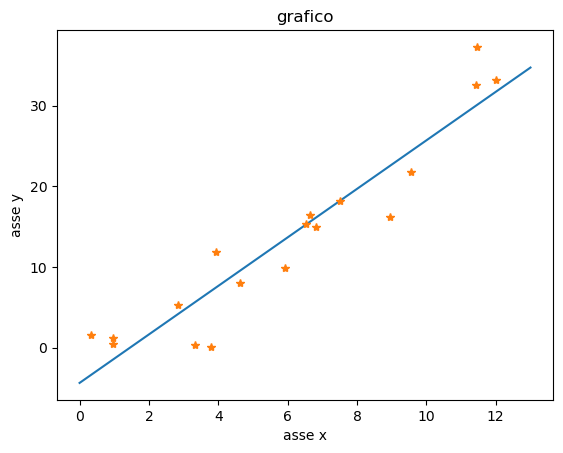

In [6]:
#grafico
xx = np.linspace(0,13,100)
yy = b[0] + b[1]*xx

plt.plot(xx,yy)
plt.plot(x,y,"*")

plt.xlabel("asse x")
plt.ylabel("asse y")
plt.title("grafico")
plt.show()

In [7]:
#coefficente di determinazione
R = np.sum((y_hat-y_media)**2)/np.sum((y-y_media)**2)
print("Coefficente di determinazione R2: ", R)

Coefficente di determinazione R2:  0.8905996203945861


In [8]:
#test di indipendenza

from scipy.stats import t
from math import sqrt

#calcolo il vettore dei valori stimati
y_stimati = np.dot(X,b)

#calcolo il vettore dei residui
r_residui = y - y_stimati

#calcolo s2
k=2
s2 = np.sum(r_residui**2)/(n-2)
s = sqrt(s2)

#calcolo mii
M = np.linalg.inv(np.dot(X.T, X))
m = M[1][1]

#calcoliamo la variabile
V = b[1]/s*sqrt(m)
print("V: ", V)

alpha = 0.05
#calcoliamo t
T = t.ppf(1-alpha/2, n-k)
print("T: ", T)

if V >= T:
    print("L'ipotesi nulla può essere rigettata.")
else:
    print("L'ipotesi nulla non può essere rigettata.")
    



  


V:  0.049233686791620886
T:  2.1199052992210112
L'ipotesi nulla non può essere rigettata.
